<a href="https://colab.research.google.com/github/DRzaidallal/IAworks/blob/main/RULFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [64]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows=50

In [65]:
train=pd.read_csv('/content/drive/MyDrive/NASA-turbofan/train_FD001.txt',sep='\s+',header=None)
test=pd.read_csv('/content/drive/MyDrive/NASA-turbofan/test_FD001.txt',sep='\s+',header=None)
RUL=pd.read_csv('/content/drive/MyDrive/NASA-turbofan/RUL_FD001.txt',sep='\s+',header=None)

In [66]:
print(train.shape)
print(list(train.columns))

(20631, 26)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [67]:
columns = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 
           's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
           's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'
]
train.columns=columns
test.columns=columns
RUL.columns=['RUL']

In [68]:
print(train.shape)
print(list(train.columns))

(20631, 26)
['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


**NANS**

In [69]:
train.isna().sum()


unit           0
cycles         0
op_setting1    0
op_setting2    0
op_setting3    0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
s7             0
s8             0
s9             0
s10            0
s11            0
s12            0
s13            0
s14            0
s15            0
s16            0
s17            0
s18            0
s19            0
s20            0
s21            0
dtype: int64

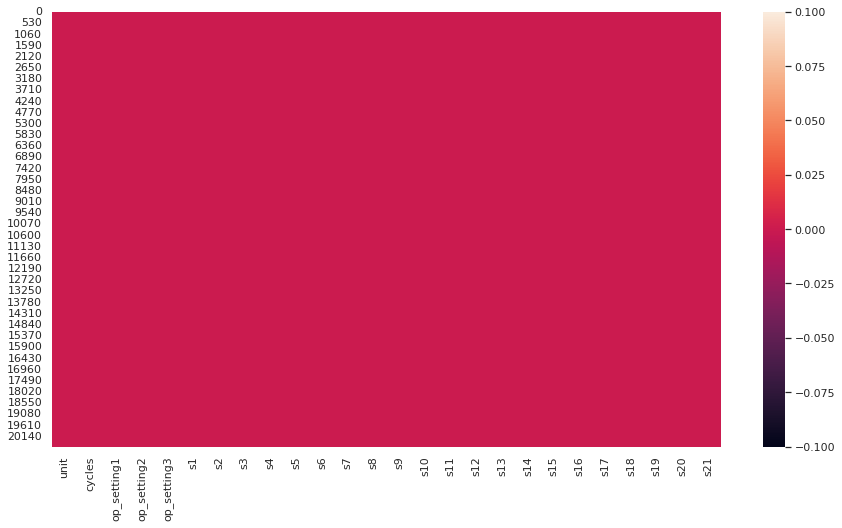

In [70]:
sns.heatmap(train.isnull())
plt.savefig('/content/drive/MyDrive/NasaRULfres/NANtrain.pdf')

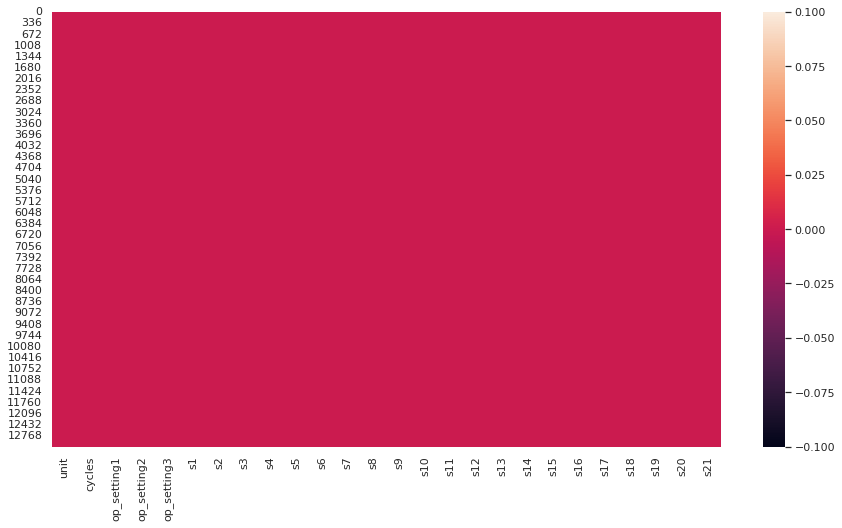

In [71]:
sns.heatmap(test.isnull())
plt.savefig('/content/drive/MyDrive/NasaRULfres/NANtest.pdf')

**inspect the train set**

In [72]:
train.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.001,-0.000,100.000,518.670,641.820,1589.700,1400.600,14.620,...,521.660,2388.020,8138.620,8.419,0.030,392,2388,100.000,39.060,23.419
1,1,2,0.002,-0.000,100.000,518.670,642.150,1591.820,1403.140,14.620,...,522.280,2388.070,8131.490,8.432,0.030,392,2388,100.000,39.000,23.424
2,1,3,-0.004,0.000,100.000,518.670,642.350,1587.990,1404.200,14.620,...,522.420,2388.030,8133.230,8.418,0.030,390,2388,100.000,38.950,23.344
3,1,4,0.001,0.000,100.000,518.670,642.350,1582.790,1401.870,14.620,...,522.860,2388.080,8133.830,8.368,0.030,392,2388,100.000,38.880,23.374
4,1,5,-0.002,-0.000,100.000,518.670,642.370,1582.850,1406.220,14.620,...,522.190,2388.040,8133.800,8.429,0.030,393,2388,100.000,38.900,23.404


In [73]:
train.tail()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
20626,100,196,-0.000,-0.000,100.000,518.670,643.490,1597.980,1428.630,14.620,...,519.490,2388.260,8137.600,8.496,0.030,397,2388,100.000,38.490,22.974
20627,100,197,-0.002,-0.001,100.000,518.670,643.540,1604.500,1433.580,14.620,...,519.680,2388.220,8136.500,8.514,0.030,395,2388,100.000,38.300,23.159
20628,100,198,0.000,0.000,100.000,518.670,643.420,1602.460,1428.180,14.620,...,520.010,2388.240,8141.050,8.565,0.030,398,2388,100.000,38.440,22.933
20629,100,199,-0.001,0.000,100.000,518.670,643.230,1605.260,1426.530,14.620,...,519.670,2388.230,8139.290,8.539,0.030,395,2388,100.000,38.290,23.064
20630,100,200,-0.003,-0.001,100.000,518.670,643.850,1600.380,1432.140,14.620,...,519.300,2388.260,8137.330,8.504,0.030,396,2388,100.000,38.370,23.052


**inspect the train set**

In [74]:
print(test.shape)
print(list(test.columns))

(13096, 26)
['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [75]:
test.isna().sum()

unit           0
cycles         0
op_setting1    0
op_setting2    0
op_setting3    0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
s7             0
s8             0
s9             0
s10            0
s11            0
s12            0
s13            0
s14            0
s15            0
s16            0
s17            0
s18            0
s19            0
s20            0
s21            0
dtype: int64

In [76]:
test.head()


,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.002,0.000,100.000,518.670,643.020,1585.290,1398.210,14.620,...,521.720,2388.030,8125.550,8.405,0.030,392,2388,100.000,38.860,23.373
1,1,2,-0.003,-0.000,100.000,518.670,641.710,1588.450,1395.420,14.620,...,522.160,2388.060,8139.620,8.380,0.030,393,2388,100.000,39.020,23.392
2,1,3,0.000,0.000,100.000,518.670,642.460,1586.940,1401.340,14.620,...,521.970,2388.030,8130.100,8.444,0.030,393,2388,100.000,39.080,23.417
3,1,4,0.004,0.000,100.000,518.670,642.440,1584.120,1406.420,14.620,...,521.380,2388.050,8132.900,8.392,0.030,391,2388,100.000,39.000,23.374
4,1,5,0.001,0.000,100.000,518.670,642.510,1587.190,1401.920,14.620,...,522.150,2388.030,8129.540,8.403,0.030,390,2388,100.000,38.990,23.413


In [77]:
test.tail()


,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
13091,100,194,0.005,0.000,100.000,518.670,643.240,1599.450,1415.790,14.620,...,520.690,2388.000,8213.280,8.472,0.030,394,2388,100.000,38.650,23.197
13092,100,195,-0.001,-0.000,100.000,518.670,643.220,1595.690,1422.050,14.620,...,521.050,2388.090,8210.850,8.451,0.030,395,2388,100.000,38.570,23.277
13093,100,196,-0.001,-0.000,100.000,518.670,643.440,1593.150,1406.820,14.620,...,521.180,2388.040,8217.240,8.457,0.030,395,2388,100.000,38.620,23.205
13094,100,197,-0.004,0.000,100.000,518.670,643.260,1594.990,1419.360,14.620,...,521.330,2388.080,8220.480,8.471,0.030,395,2388,100.000,38.660,23.270
13095,100,198,0.001,0.000,100.000,518.670,642.950,1601.620,1424.990,14.620,...,521.070,2388.050,8214.640,8.490,0.030,396,2388,100.000,38.700,23.186


**inspect the RUL**

In [78]:
print(RUL.shape)
print(list(RUL.columns))

(100, 1)
['RUL']


In [79]:
RUL.isna().sum()


RUL    0
dtype: int64

In [80]:
RUL.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [81]:
RUL.tail()

,RUL
95,137
96,82
97,59
98,117
99,20


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


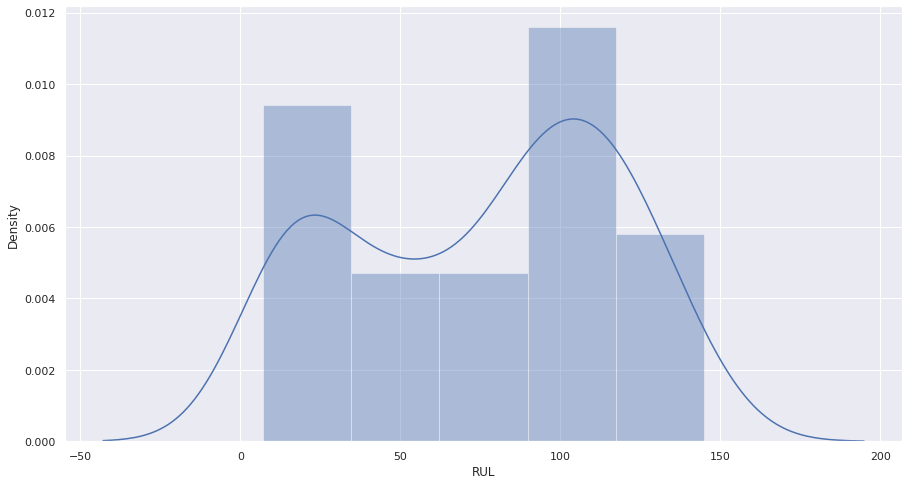

In [82]:
sns.distplot(RUL['RUL'],kde=True)
plt.savefig('/content/drive/MyDrive/NasaRULfres/RUL_distplot.pdf')

In [83]:
RUL['RUL'].describe()


count   100.000
mean     75.520
std      41.765
min       7.000
25%      32.750
50%      86.000
75%     112.250
max     145.000
Name: RUL, dtype: float64

In [84]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
unit,20631.000,51.507,29.228,1.000,26.000,52.000,77.000,100.000
cycles,20631.000,108.808,68.881,1.000,52.000,104.000,156.000,362.000
op_setting1,20631.000,-0.000,0.002,-0.009,-0.002,0.000,0.002,0.009
op_setting2,20631.000,0.000,0.000,-0.001,-0.000,0.000,0.000,0.001
op_setting3,20631.000,100.000,0.000,100.000,100.000,100.000,100.000,100.000
s1,20631.000,518.670,0.000,518.670,518.670,518.670,518.670,518.670
s2,20631.000,642.681,0.500,641.210,642.325,642.640,643.000,644.530
s3,20631.000,1590.523,6.131,1571.040,1586.260,1590.100,1594.380,1616.910
s4,20631.000,1408.934,9.001,1382.250,1402.360,1408.040,1414.555,1441.490
s5,20631.000,14.620,0.000,14.620,14.620,14.620,14.620,14.620


In [85]:
test.describe().T


,count,mean,std,min,25%,50%,75%,max
unit,13096.000,51.544,28.289,1.000,28.000,52.000,76.000,100.000
cycles,13096.000,76.837,53.058,1.000,33.000,69.000,113.000,303.000
op_setting1,13096.000,-0.000,0.002,-0.008,-0.002,0.000,0.002,0.008
op_setting2,13096.000,0.000,0.000,-0.001,-0.000,0.000,0.000,0.001
op_setting3,13096.000,100.000,0.000,100.000,100.000,100.000,100.000,100.000
s1,13096.000,518.670,0.000,518.670,518.670,518.670,518.670,518.670
s2,13096.000,642.475,0.401,641.130,642.197,642.460,642.740,644.300
s3,13096.000,1588.099,5.003,1569.040,1584.600,1587.990,1591.362,1607.550
s4,13096.000,1404.735,6.688,1384.390,1399.950,1404.440,1409.050,1433.360
s5,13096.000,14.620,0.000,14.620,14.620,14.620,14.620,14.620


In [86]:
to_drop=['s1','s6', 's5', 's10', 's16', 's18', 's19','op_setting3']
train.drop(columns=to_drop, axis=1, inplace=True)
test.drop(columns=to_drop, axis=1, inplace=True)

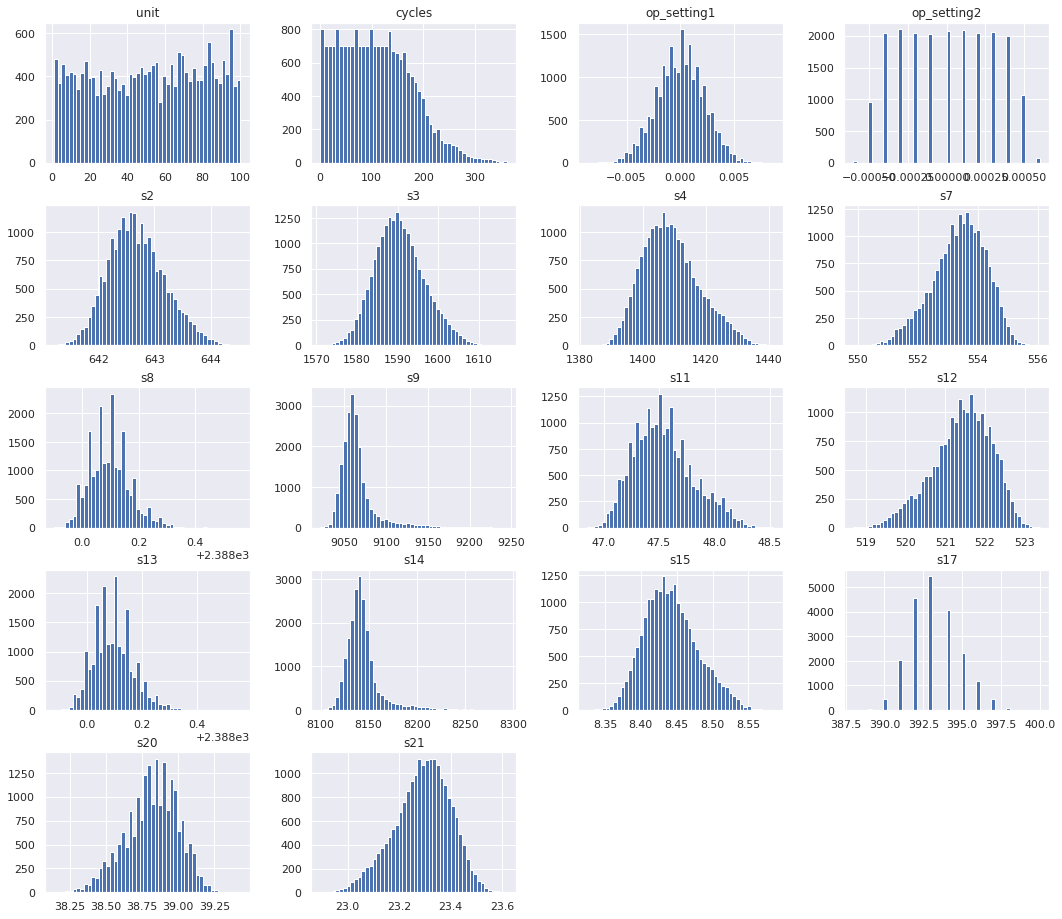

In [87]:
train.hist(bins=50, figsize=(18,16))
plt.savefig('/content/drive/MyDrive/NasaRULfres/Trainhisto.pdf')
plt.show()

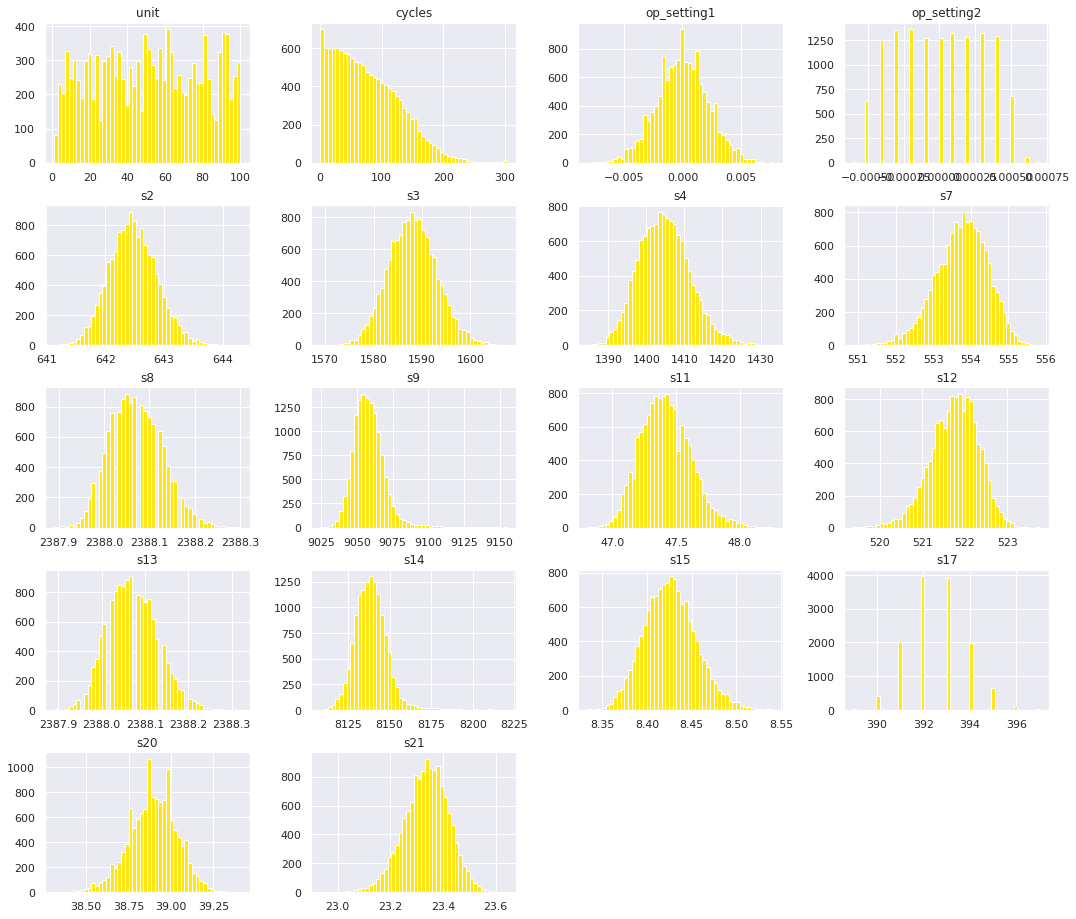

In [88]:
test.hist(bins=50, figsize=(18,16), color="#FEE715FF")
plt.savefig('/content/drive/MyDrive/NasaRULfres/Testhisto.pdf')
plt.show()

**lets compare the train and test data distribution**

In [89]:
train.shape

(20631, 18)

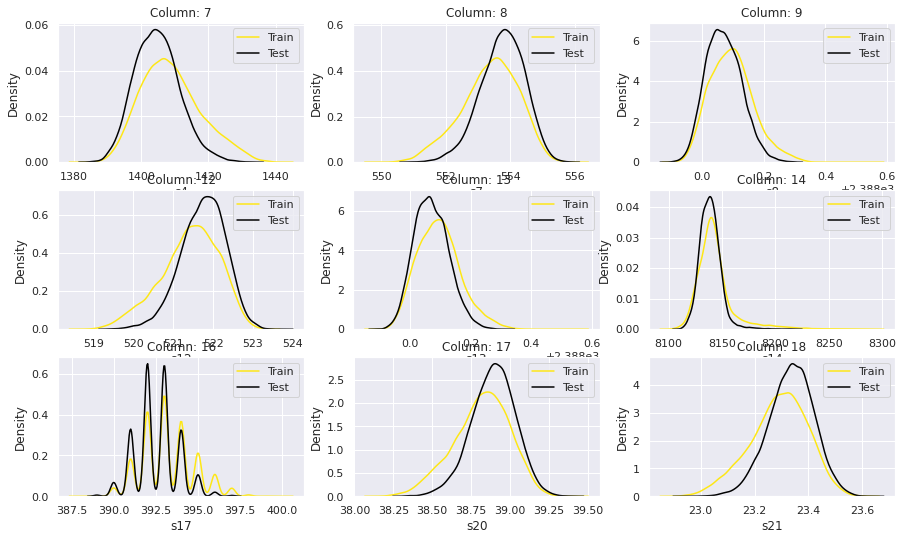

In [90]:
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17]):
    temp_train = train.iloc[:, j]
    temp_test = test.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp_train, legend = False, color = "#FEE715FF", label = "Train")
    sns.kdeplot(temp_test, legend = False, color = "black", label = "Test")
    plt.title("Column: "+ str(j+1))
    plt.legend()
plt.savefig('/content/drive/MyDrive/NasaRULfres/Comparisonhisto.pdf')    
plt.show()

# **EDA**

<ipython-input-91-ff99301b4ee4>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  bars = plt.stem(list(cyclestrain['unit']), cyclestrain['cycles'])#, color='red', color='#101820FF'
<ipython-input-91-ff99301b4ee4>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  bars = plt.stem(list(cyclestest['unit']), cyclestest['cycles'])


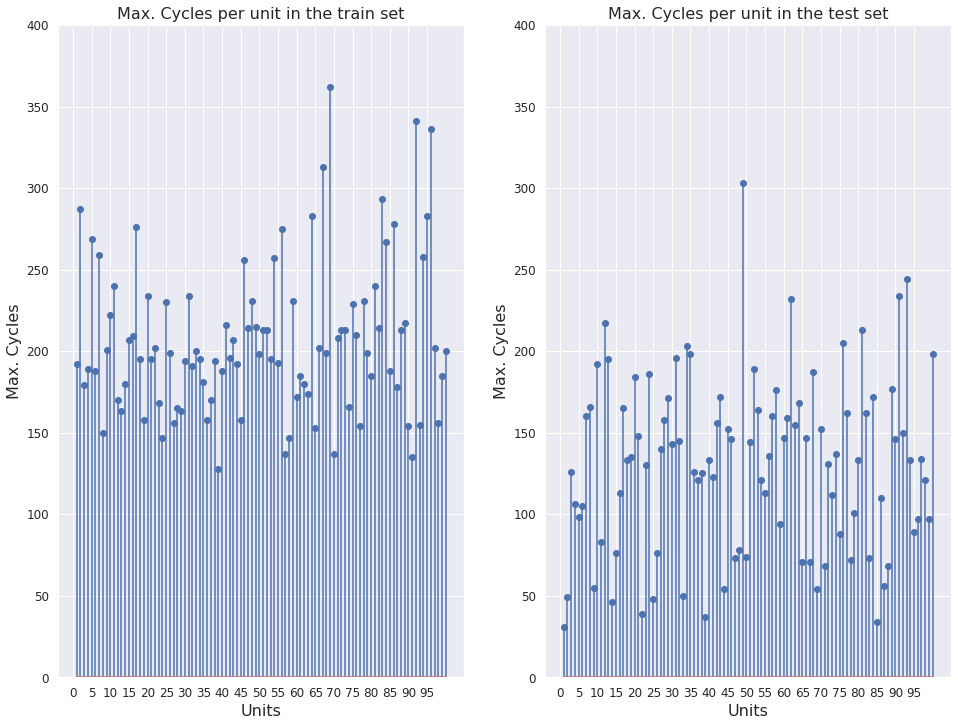

In [91]:
cyclestrain = train.groupby('unit', as_index=False)['cycles'].max()
cyclestest = test.groupby('unit', as_index=False)['cycles'].max()
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['unit'])
bars = plt.stem(list(cyclestrain['unit']), cyclestrain['cycles'])#, color='red', color='#101820FF'
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in the train set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.stem(list(cyclestest['unit']), cyclestest['cycles'])
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in the test set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('/content/drive/MyDrive/NasaRULfres/stem.pdf')
plt.show()

**sensorsVSunit**

In [92]:
train.columns

Index(['unit', 'cycles', 'op_setting1', 'op_setting2', 's2', 's3', 's4', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21'],
      dtype='object')

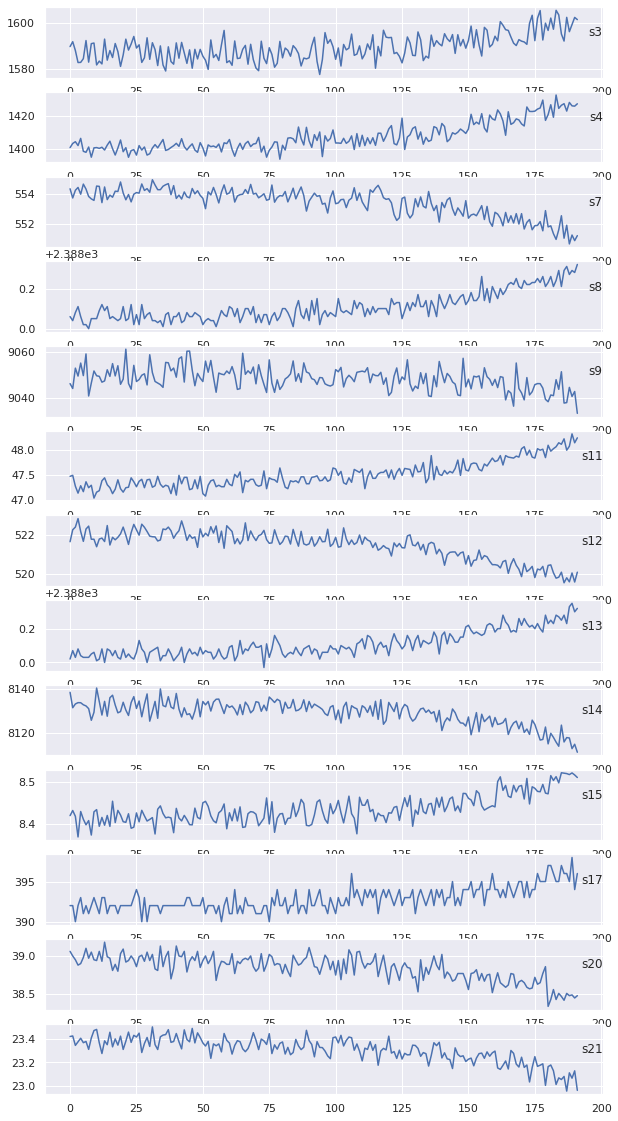

In [93]:
values = train[train.unit==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(train.columns[group], y=0.5, loc='right')
 i += 1
 plt.savefig('/content/drive/MyDrive/NasaRULfres/Unitsensors.pdf')
plt.show()

**continue**

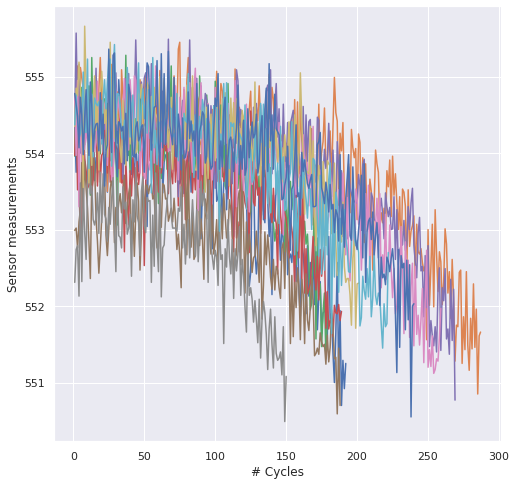

In [94]:
plt.figure(figsize = (8, 8))
plt.plot(train[train.unit==1].cycles, train[train.unit==1].s7)
plt.plot(train[train.unit==2].cycles, train[train.unit==2].s7)
plt.plot(train[train.unit==3].cycles, train[train.unit==3].s7)
plt.plot(train[train.unit==4].cycles, train[train.unit==4].s7)
plt.plot(train[train.unit==5].cycles, train[train.unit==5].s7)
plt.plot(train[train.unit==6].cycles, train[train.unit==6].s7)
plt.plot(train[train.unit==7].cycles, train[train.unit==7].s7)
plt.plot(train[train.unit==8].cycles, train[train.unit==8].s7)
plt.plot(train[train.unit==9].cycles, train[train.unit==9].s7)
plt.plot(train[train.unit==10].cycles, train[train.unit==10].s7)
plt.plot(train[train.unit==11].cycles, train[train.unit==11].s7)
plt.xlabel('# Cycles')
plt.ylabel('Sensor measurements')
plt.savefig('/content/drive/MyDrive/NasaRULfres/Unitssensor.pdf')
plt.show()

**MAX-MINVs units**

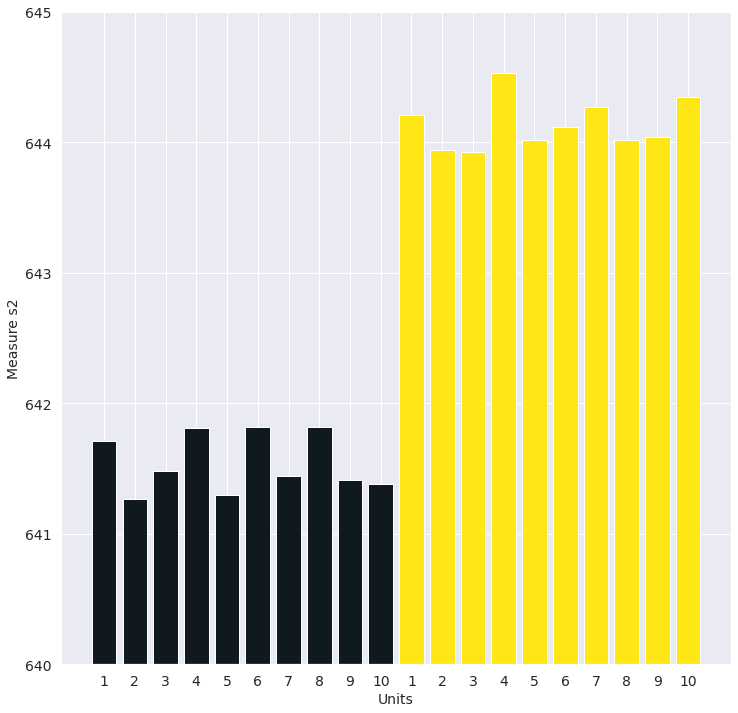

In [95]:
minb = train.groupby('unit', as_index=False).min().head(10)
maxb = train.groupby('unit', as_index=False).max().head(10)
mmtable = minb.append(maxb, ignore_index=True)
plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('#101820FF', 10), np.repeat('#FEE715FF', 10)), axis=0)
bar_labels = list(mmtable['unit'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['s2'], color=col)
plt.ylim([640, 645])
plt.xlabel('Units', fontsize=14)
plt.ylabel('Measure s2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/NasaRULfres/maxvalues_minvalues.pdf')
plt.show()

**DataPreparation**

In [96]:
train = pd.merge(train, train.groupby('unit', as_index=False)['cycles'].max(), how='left', on='unit')
train.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"},inplace=True)

In [97]:
train.maxcycles[train['unit']==1].values[0]

192

**TTF**

In [98]:
#piecewise TTF
def process_targets(data_length, early_rul = None):
    """ 
    Takes datalength (i.e., total number of cycles for each engine) and early_rul as input and 
    creates target rul.
    
    Arguments:
        data_length: (scaler) Number of cycles for each engine
        early_rul: (scaler) Early RUL value to be set. When set to `None`, linear degradation
                   curve is used. (deafult: None)

    Returns:
        target_array: (1D float array) Target array
    """
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0  :    # This condition is needed when early rul is larger than data_length of an engine
            target_array = np.arange(data_length-1, -1, -1)
            return target_array
        else:
            target_array = np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))
            return target_array
#list of piecewise RULs
Pruls=[]
for i in range(np.min(train['unit']),np.max(train['unit'])+1):
 array= process_targets(train.maxcycles[train['unit']==i].values[0], early_rul =125)
 Pruls.append(array)
array=Pruls[0]
for i in range(1, len(Pruls)):
 array=np.concatenate((array, Pruls[i]), axis=None)
train['TTF']=array
train 

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,TTF
0,1,1,-0.001,-0.000,641.820,1589.700,1400.600,554.360,2388.060,9046.190,47.470,521.660,2388.020,8138.620,8.419,392,39.060,23.419,192,125.000
1,1,2,0.002,-0.000,642.150,1591.820,1403.140,553.750,2388.040,9044.070,47.490,522.280,2388.070,8131.490,8.432,392,39.000,23.424,192,125.000
2,1,3,-0.004,0.000,642.350,1587.990,1404.200,554.260,2388.080,9052.940,47.270,522.420,2388.030,8133.230,8.418,390,38.950,23.344,192,125.000
3,1,4,0.001,0.000,642.350,1582.790,1401.870,554.450,2388.110,9049.480,47.130,522.860,2388.080,8133.830,8.368,392,38.880,23.374,192,125.000
4,1,5,-0.002,-0.000,642.370,1582.850,1406.220,554.000,2388.060,9055.150,47.280,522.190,2388.040,8133.800,8.429,393,38.900,23.404,192,125.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.000,-0.000,643.490,1597.980,1428.630,551.430,2388.190,9065.520,48.070,519.490,2388.260,8137.600,8.496,397,38.490,22.974,200,4.000
20627,100,197,-0.002,-0.001,643.540,1604.500,1433.580,550.860,2388.230,9065.110,48.040,519.680,2388.220,8136.500,8.514,395,38.300,23.159,200,3.000
20628,100,198,0.000,0.000,643.420,1602.460,1428.180,550.940,2388.240,9065.900,48.090,520.010,2388.240,8141.050,8.565,398,38.440,22.933,200,2.000
20629,100,199,-0.001,0.000,643.230,1605.260,1426.530,550.680,2388.250,9073.720,48.390,519.670,2388.230,8139.290,8.539,395,38.290,23.064,200,1.000


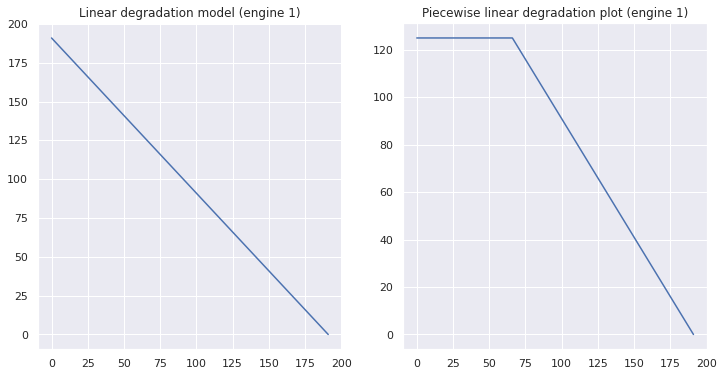

In [99]:
engine_1_linear_degradation_model = np.arange(192-1, -1, -1)

# Piecewise_linear_degradation model
early_rul = 125
engine_1_piecewise_linear_degradation_model = np.append(early_rul*np.ones(shape = (192-early_rul,)), np.arange(early_rul-1, -1, -1))
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(engine_1_linear_degradation_model)
plt.title("Linear degradation model (engine 1)")
plt.subplot(122)
plt.plot(engine_1_piecewise_linear_degradation_model)
plt.title("Piecewise linear degradation plot (engine 1)")
plt.savefig('/content/drive/MyDrive/NasaRULfres/Linearpiecewise.pdf')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


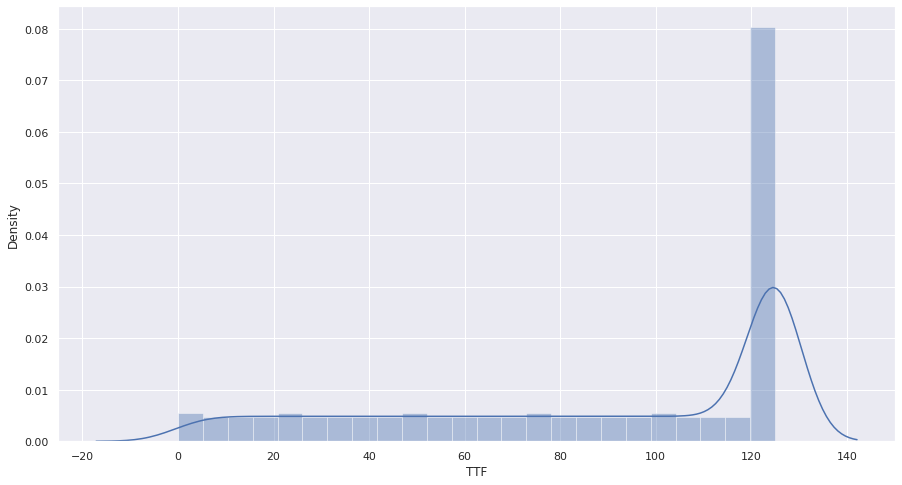

In [100]:
#linear TTF
#train['linearTTF'] = train['maxcycles'] - train['cycles']
sns.distplot(train['TTF'],kde=True)
train['TTF'].describe()
#train
plt.savefig('/content/drive/MyDrive/NasaRULfres/TTF.pdf')

In [101]:
cyclestrain

,unit,cycles
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


**scaling**

In [102]:
scaler = MinMaxScaler()
ntrain = train.copy()
ntest = test.copy()
ntrain.iloc[:,2:18] = scaler.fit_transform(ntrain.iloc[:,2:18])
ntest.iloc[:,2:18] = scaler.transform(ntest.iloc[:,2:18])
ntest.describe().T
ntrain.describe().T
plt.savefig('/content/drive/MyDrive/NasaRULfres/ScaledTable.pdf')

<Figure size 1080x576 with 0 Axes>

In [103]:
ntrain.columns

Index(['unit', 'cycles', 'op_setting1', 'op_setting2', 's2', 's3', 's4', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21',
       'maxcycles', 'TTF'],
      dtype='object')

**Outliers**

In [104]:
from scipy import stats
from scipy.stats.mstats import winsorize
#Flooring_capping
def floor_cap(DT1,columns):
 dummies=DT1.loc[:,['unit', 'cycles']]
 DT=DT1.loc[:,columns]
 for c in DT.select_dtypes('number'):
  if c != 'maxcycles' and c != 'TTF':  
   Q1 = DT[c].quantile(0.25)
   Q3 = DT[c].quantile(0.75)
   IQR = Q3 - Q1
   whisker_width = 1.5
   lower_whisker = Q1 -(whisker_width*IQR)
   upper_whisker = Q3 + (whisker_width*IQR)
   DT[c]=np.where(DT[c]>upper_whisker,upper_whisker,np.where(DT[c]<lower_whisker,lower_whisker,DT[c]))
  DTF=pd.concat([dummies,DT], axis=1)
 return DTF
#winsore
def winsor(Datas):
   #winsorize
  for c in Datas.columns:
    if c != 'maxcycles' and c != 'TTF':
     winsorize(Datas[c], limits=0.05)
  return Datas
#outliers removal using local outlier factor  
from sklearn.neighbors import LocalOutlierFactor
def LOFhandle(X_train,y_train):
  # identify outliers in the training dataset
  lof = LocalOutlierFactor()
  yhat = lof.fit_predict(X_train)
  # select all rows that are not outliers
  mask = yhat != -1
  X_train, y_train = X_train[mask, :], y_train[mask]
  return X_train,y_train

# Outlier detection and remove with Z-score
def out_rem(cpt): 
 columns = list(cpt.columns)
 rows_to_drop = []
 for col in columns:
     if cpt[col].dtype != np.float64 and cpt[col].dtype != np.int64:
         continue
     z_scores = stats.zscore(cpt[col])
     for i in range(len(z_scores)):
         if abs(z_scores[i]) > 3:
             rows_to_drop.append(i)

 rows_to_drop = sorted(list(set(rows_to_drop)))
 cpt = cpt.drop(rows_to_drop)
 cpt.reset_index(drop=True, inplace=True)
out_rem(ntrain)
out_rem(ntest)

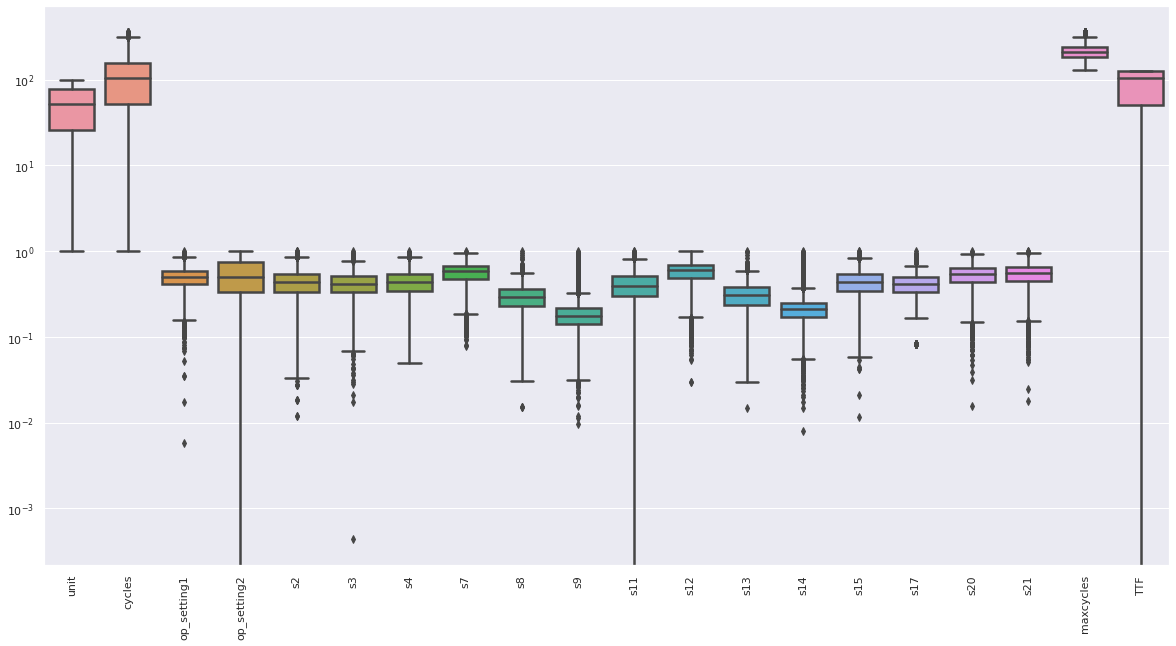

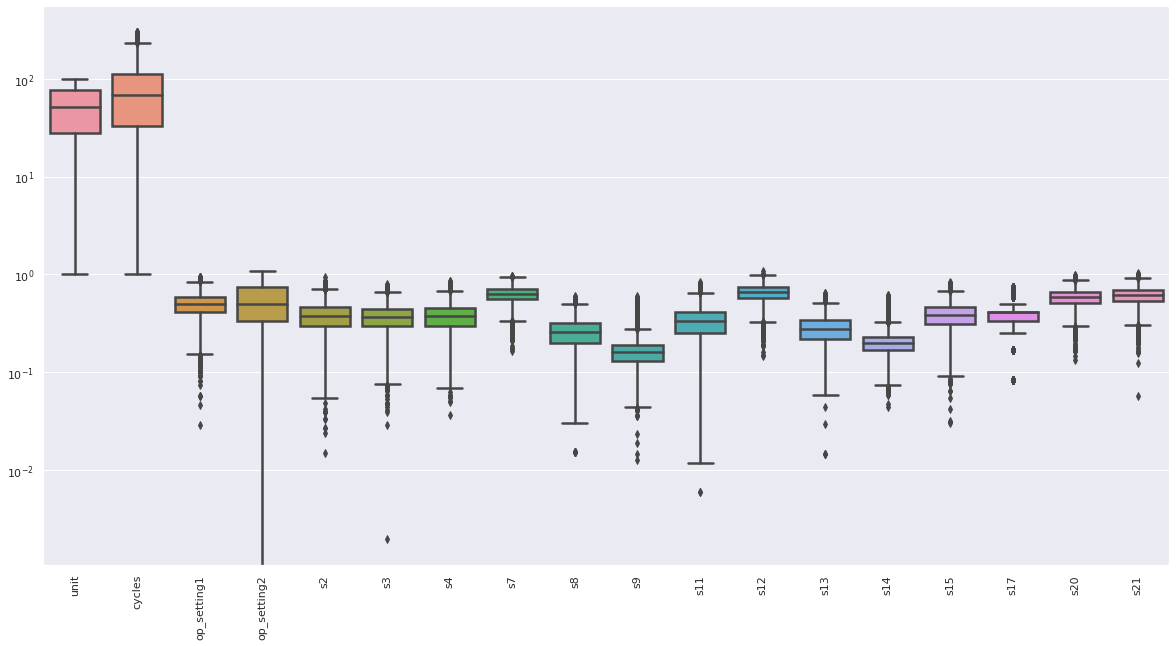

In [105]:
def generate_outliersbxplot(cp,name):
 a4_dims = (20.17, 10.27)
 fig, ax = plt.subplots(figsize=a4_dims)
 g = sns.boxplot(data=cp,linewidth=2.5,ax=ax)
 plt.xticks(rotation=90)
 g.set_yscale("log")
 plt.savefig('/content/drive/MyDrive/NasaRULfres/'+name+'outliers.pdf')
 plt.show()
generate_outliersbxplot(ntrain,"Train")
generate_outliersbxplot(ntest,"Test") 

In [106]:
ntrain

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,TTF
0,1,1,0.460,0.167,0.184,0.407,0.310,0.726,0.242,0.110,0.369,0.633,0.206,0.200,0.364,0.333,0.713,0.725,192,125.000
1,1,2,0.609,0.250,0.283,0.453,0.353,0.628,0.212,0.100,0.381,0.765,0.279,0.163,0.411,0.333,0.667,0.731,192,125.000
2,1,3,0.253,0.750,0.343,0.370,0.371,0.710,0.273,0.140,0.250,0.795,0.221,0.172,0.357,0.167,0.628,0.621,192,125.000
3,1,4,0.540,0.500,0.343,0.256,0.331,0.741,0.318,0.125,0.167,0.889,0.294,0.175,0.167,0.333,0.574,0.662,192,125.000
4,1,5,0.391,0.333,0.349,0.257,0.405,0.668,0.242,0.150,0.256,0.746,0.235,0.175,0.402,0.417,0.589,0.705,192,125.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477,0.250,0.687,0.587,0.783,0.254,0.439,0.196,0.726,0.171,0.559,0.194,0.657,0.750,0.271,0.110,200,4.000
20627,100,197,0.408,0.083,0.702,0.729,0.866,0.163,0.500,0.195,0.708,0.211,0.500,0.189,0.727,0.583,0.124,0.366,200,3.000
20628,100,198,0.523,0.500,0.666,0.685,0.775,0.176,0.515,0.198,0.738,0.281,0.529,0.212,0.922,0.833,0.233,0.054,200,2.000
20629,100,199,0.437,0.750,0.608,0.746,0.747,0.134,0.530,0.233,0.917,0.209,0.515,0.203,0.823,0.583,0.116,0.234,200,1.000


**#some series contains outliers**

In [107]:
ntrain.shape

(20631, 20)

**correlation**

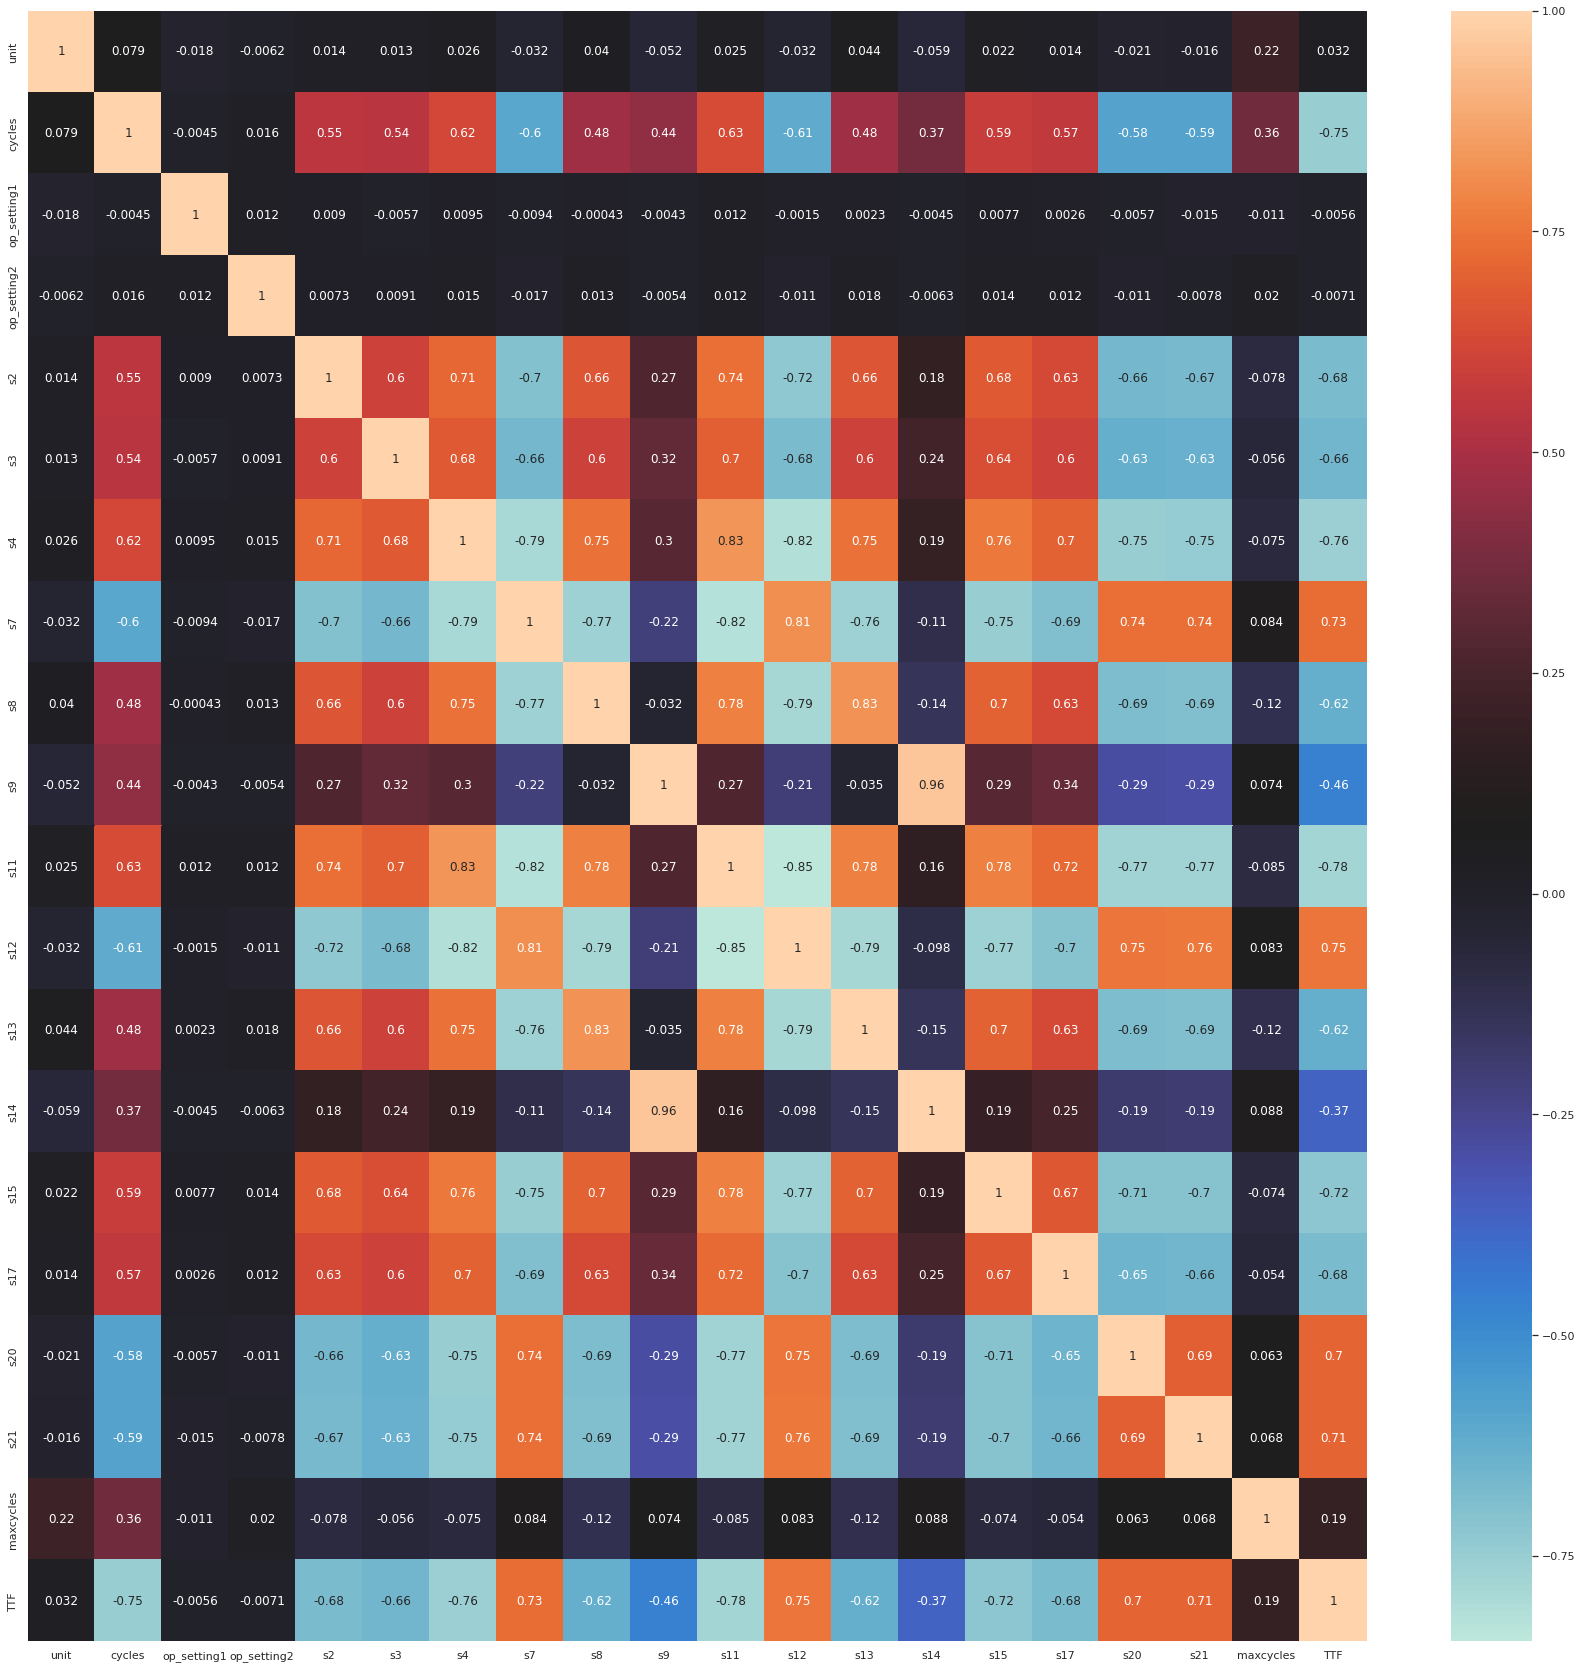

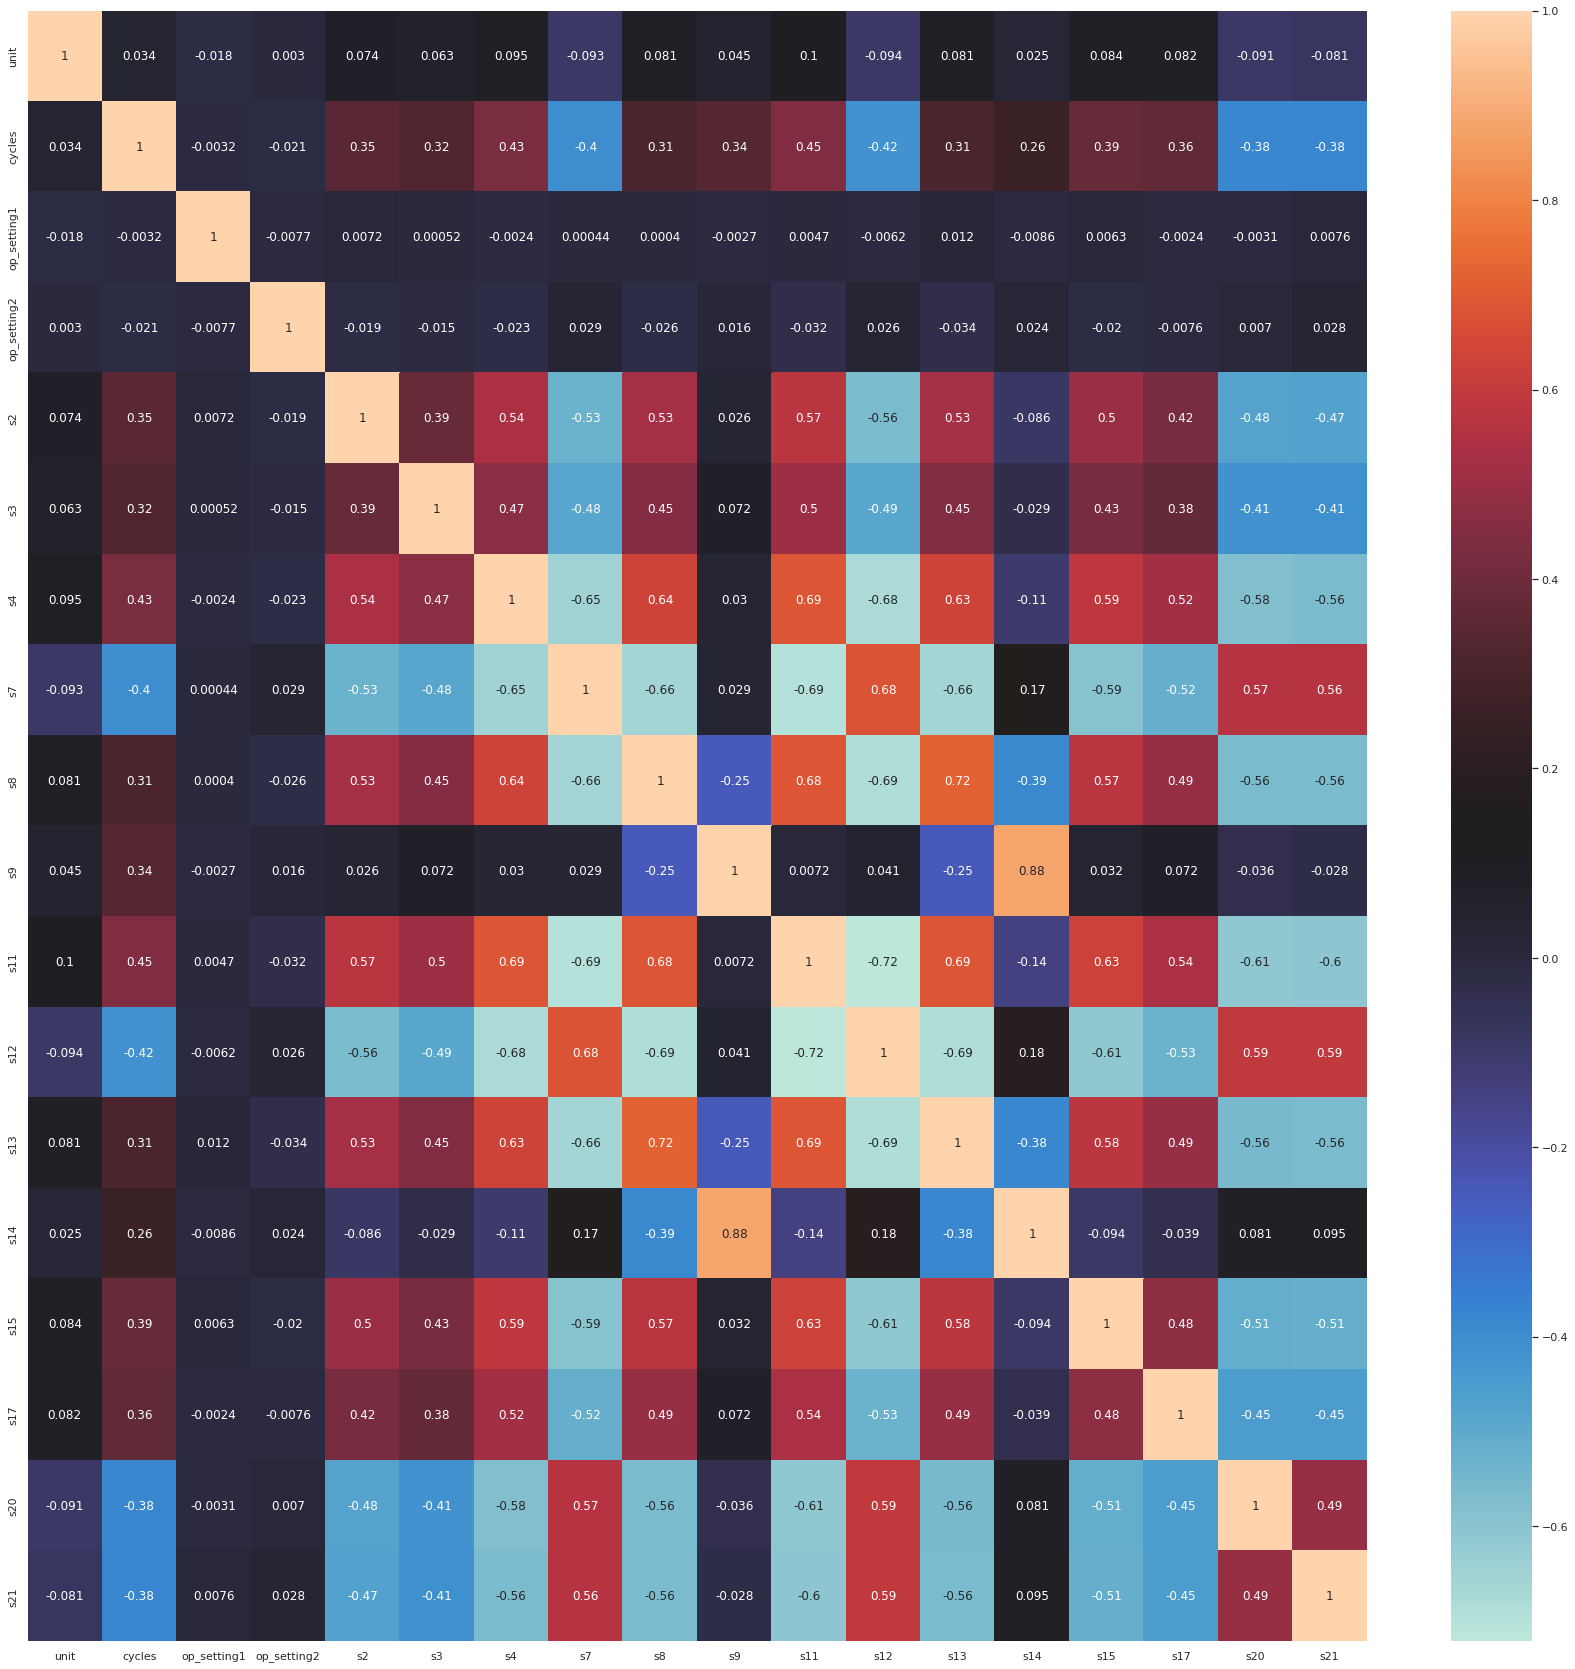

In [108]:
def generate_correlation(cp,name):
 correlationd=cp.corr()
 top_correlatedF=correlationd.index
 plt.figure(figsize=(30,30))
 sns.set(rc = {'figure.figsize':(15,8)})
 g=sns.heatmap(cp[top_correlatedF].corr(),annot=True,cmap="icefire")
 plt.savefig('/content/drive/MyDrive/NasaRULfres/'+name+'corr.pdf')
 plt.show()
generate_correlation(ntrain,"Train")
generate_correlation(ntest,"Test")

In [109]:
train.columns

Index(['unit', 'cycles', 'op_setting1', 'op_setting2', 's2', 's3', 's4', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21',
       'maxcycles', 'TTF'],
      dtype='object')

**Visualize scaled data**

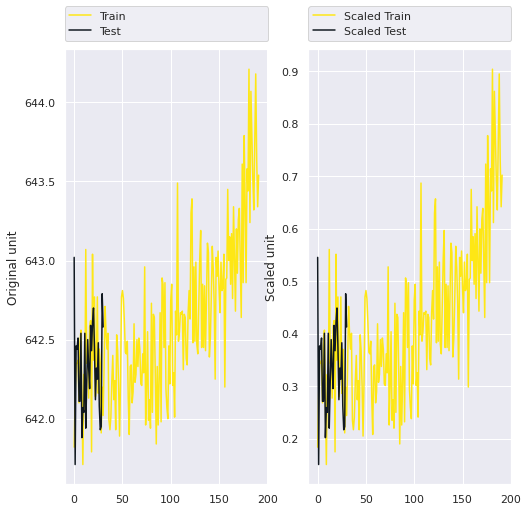

In [110]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(train[train.unit==1].s2, color="#FEE715FF")
plt.plot(test[test.unit==1].s2, color='#101820FF')
plt.legend(["Train","Test"], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.unit==1].s2, color="#FEE715FF")
plt.plot(ntest[ntest.unit==1].s2, color="#101820FF")
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.savefig('/content/drive/MyDrive/NasaRULfres/Comparingscaling.pdf')
plt.show()

**fTTF**

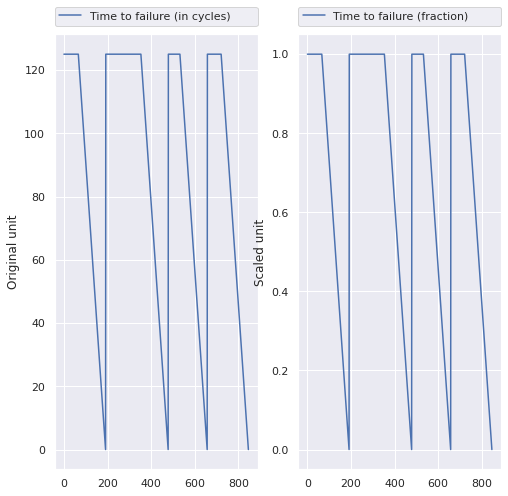

In [111]:
def fractionTTF(dat,q):
 return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())
fTTFz = []
fTTF = []
for i in range(train['unit'].min(),train['unit'].max()+1):
 dat=train[train.unit==i]
 dat = dat.reset_index(drop=True)
 for q in range(len(dat)):
  fTTFz = fractionTTF(dat, q)
  fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF
mx = cyclestrain.iloc[0:4,1].sum()
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.savefig('/content/drive/MyDrive/NasaRULfres/TTF&FTTF.pdf')
plt.show()

In [112]:
ntrain
#Trainscaling.jpg

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s7,s8,s9,...,s12,s13,s14,s15,s17,s20,s21,maxcycles,TTF,fTTF
0,1,1,0.460,0.167,0.184,0.407,0.310,0.726,0.242,0.110,...,0.633,0.206,0.200,0.364,0.333,0.713,0.725,192,125.000,1.000
1,1,2,0.609,0.250,0.283,0.453,0.353,0.628,0.212,0.100,...,0.765,0.279,0.163,0.411,0.333,0.667,0.731,192,125.000,1.000
2,1,3,0.253,0.750,0.343,0.370,0.371,0.710,0.273,0.140,...,0.795,0.221,0.172,0.357,0.167,0.628,0.621,192,125.000,1.000
3,1,4,0.540,0.500,0.343,0.256,0.331,0.741,0.318,0.125,...,0.889,0.294,0.175,0.167,0.333,0.574,0.662,192,125.000,1.000
4,1,5,0.391,0.333,0.349,0.257,0.405,0.668,0.242,0.150,...,0.746,0.235,0.175,0.402,0.417,0.589,0.705,192,125.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477,0.250,0.687,0.587,0.783,0.254,0.439,0.196,...,0.171,0.559,0.194,0.657,0.750,0.271,0.110,200,4.000,0.032
20627,100,197,0.408,0.083,0.702,0.729,0.866,0.163,0.500,0.195,...,0.211,0.500,0.189,0.727,0.583,0.124,0.366,200,3.000,0.024
20628,100,198,0.523,0.500,0.666,0.685,0.775,0.176,0.515,0.198,...,0.281,0.529,0.212,0.922,0.833,0.233,0.054,200,2.000,0.016
20629,100,199,0.437,0.750,0.608,0.746,0.747,0.134,0.530,0.233,...,0.209,0.515,0.203,0.823,0.583,0.116,0.234,200,1.000,0.008


# **Continue**

In [113]:
ntrain.columns

Index(['unit', 'cycles', 'op_setting1', 'op_setting2', 's2', 's3', 's4', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21',
       'maxcycles', 'TTF', 'fTTF'],
      dtype='object')

In [114]:
print(pd.DataFrame(ntrain.columns).T)
X_train = np.round(ntrain.values[:,1:18],2)
X_train

     0       1            2            3   4   5   6   7   8   9   ...   11  \
0  unit  cycles  op_setting1  op_setting2  s2  s3  s4  s7  s8  s9  ...  s12   

    12   13   14   15   16   17         18   19    20  
0  s13  s14  s15  s17  s20  s21  maxcycles  TTF  fTTF  

[1 rows x 21 columns]


array([[1.00e+00, 4.60e-01, 1.70e-01, ..., 3.30e-01, 7.10e-01, 7.20e-01],
       [2.00e+00, 6.10e-01, 2.50e-01, ..., 3.30e-01, 6.70e-01, 7.30e-01],
       [3.00e+00, 2.50e-01, 7.50e-01, ..., 1.70e-01, 6.30e-01, 6.20e-01],
       ...,
       [1.98e+02, 5.20e-01, 5.00e-01, ..., 8.30e-01, 2.30e-01, 5.00e-02],
       [1.99e+02, 4.40e-01, 7.50e-01, ..., 5.80e-01, 1.20e-01, 2.30e-01],
       [2.00e+02, 3.20e-01, 8.00e-02, ..., 6.70e-01, 1.80e-01, 2.20e-01]])

In [115]:
Y_train = ntrain.values[:, 20]
Y_train

array([1.   , 1.   , 1.   , ..., 0.016, 0.008, 0.   ])

In [116]:
X_train,Y_train=LOFhandle(X_train,Y_train)

In [117]:
print(pd.DataFrame(ntest.columns).T)
X_test =np.round(ntest.values[:,1:],2)
X_test

     0       1            2            3   4   5   6   7   8   9    10   11  \
0  unit  cycles  op_setting1  op_setting2  s2  s3  s4  s7  s8  s9  s11  s12   

    12   13   14   15   16   17  
0  s13  s14  s15  s17  s20  s21  


array([[  1.  ,   0.63,   0.75, ...,   0.33,   0.56,   0.66],
       [  2.  ,   0.34,   0.25, ...,   0.42,   0.68,   0.69],
       [  3.  ,   0.52,   0.58, ...,   0.42,   0.73,   0.72],
       ...,
       [196.  ,   0.47,   0.25, ...,   0.58,   0.37,   0.43],
       [197.  ,   0.28,   0.58, ...,   0.58,   0.4 ,   0.52],
       [198.  ,   0.57,   0.75, ...,   0.67,   0.43,   0.4 ]])

# **Modeling**

**scores dataframes**

In [ ]:
scores=pd.DataFrame()
columns=['cycles', 'op_setting1', 'op_setting2', 's2', 's3', 's4', 's7',
       's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
feature_names=columns

**Fimportance**

In [ ]:
from sklearn.inspection import permutation_importance
def FImportance(model,X,y):
 # perform permutation importance
 #model.fit(X,y)
 result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=2)

 model_importances = pd.Series(result.importances_mean, index=feature_names)

 fig, ax = plt.subplots()
 model_importances.plot.bar(yerr=result.importances_std, ax=ax)
 ax.set_title("Feature importances using permutation on full model")
 ax.set_ylabel("Mean accuracy decrease")
 fig.tight_layout()
 plt.show()

**import_regressores**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost
from sklearn import neighbors
from xgboost import XGBRegressor
import lightgbm as lbm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import VotingRegressor,BaggingRegressor,StackingRegressor
#import of Gcv and Kfold
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
KNN =neighbors.KNeighborsRegressor()
DecisionTree =DecisionTreeRegressor()
RandomForest =RandomForestRegressor()
xgb_reg=XGBRegressor()
# objective ='reg:squarederror'
lgb_reg=lbm.LGBMRegressor()
SVRM =SVR()
MLP=MLPRegressor()
GBR=GradientBoostingRegressor()
ADATREE=AdaBoostRegressor()
#Bagging
BAG=BaggingRegressor(base_estimator=MLP,random_state=0,oob_score=True)
#voting
Vot=make_pipeline(VotingRegressor([('XGBoost',xgb_reg),('RandomForest',RandomForest),('lightgbm',lgb_reg)]))
#Stacking
Stack=make_pipeline(StackingRegressor([('LightGBM',lgb_reg),('XGB_REGRESSOR',xgb_reg),('Random_Forest',RandomForest)]        
                                      ,final_estimator=SVRM))
models1=[]

**build models dict**

In [ ]:
dict_of_models = {
                  'DecisionTree':DecisionTree,
                  'RandomForest':RandomForest, 
                  'XGB_REGRESSOR':xgb_reg,
                  'LightGBM':lgb_reg,
                  'MLPerceptron':MLP,
                  'Voting': Vot,
                  'Stacking' : Stack,
                  'Bagging':BAG
                 }

In [ ]:
models1=['DecisionTree','RandomForest','XGB_REGRESSOR','LightGBM','MLPerceptron','Voting','Stacking','Bagging']

**arrays od errors and results**

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer,QuantileTransformer 
from sklearn.preprocessing import PolynomialFeatures
import joblib
sns.set(font_scale=1)
MAE_vec= np.zeros([len(dict_of_models)],dtype=np.double)
MSE_vec= np.zeros([len(dict_of_models)],dtype=np.double)
RMSE_vec= np.zeros([len(dict_of_models)],dtype=np.double)
rae_val_vec=np.zeros([len(dict_of_models)],dtype=np.double)
rse_val_vec=np.zeros([len(dict_of_models)],dtype=np.double)
map_val_vec=np.zeros([len(dict_of_models)],dtype=np.double)
medianAbsoluteError_vec= np.zeros([len(dict_of_models)],dtype=np.double)
CD_vec= np.zeros([len(dict_of_models)],dtype=np.double)
scoresMSE_vec= np.zeros([len(dict_of_models)],dtype=np.double)

In [ ]:
for name, model in dict_of_models.items():
    print("---------------------------------------------------------------------------------------------------------------")
    print(name)
    # prepare the model with input scaling
    pipeline = Pipeline(steps=[('Quantile', QuantileTransformer()),(name,model)])
    # prepare the model with target scaling
    model = TransformedTargetRegressor(regressor=pipeline, transformer=QuantileTransformer())
    model.fit(X_train,Y_train)
    #FImportance(model,X_train,Y_train)
    #FI(model,X_train,Y_train)
    yhat = model.predict(X_test)
    scores[name]=yhat#this dataframe stores each model score
    joblib.dump(model, '/content/drive/MyDrive/NasaRULfres/Models/'+name+'_compressed.joblib', compress=3)


---------------------------------------------------------------------------------------------------------------
DecisionTree
---------------------------------------------------------------------------------------------------------------
RandomForest
---------------------------------------------------------------------------------------------------------------
XGB_REGRESSOR
[12:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
---------------------------------------------------------------------------------------------------------------
LightGBM
---------------------------------------------------------------------------------------------------------------
MLPerceptron
---------------------------------------------------------------------------------------------------------------
Voting
[12:02:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-----

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:1163: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


In [ ]:
test = pd.merge(test, test.groupby('unit',as_index=False)['cycles'].max(), how='left', on='unit')
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
for name in models1:
  test["score of %s"%name] = scores[name]
test.head()

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s7,s8,s9,...,s21,maxcycles,score of DecisionTree,score of RandomForest,score of XGB_REGRESSOR,score of LightGBM,score of MLPerceptron,score of Voting,score of Stacking,score of Bagging
0,1,1,0.002,0.000,643.020,1585.290,1398.210,553.900,2388.040,9050.170,...,23.373,31,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,1,2,-0.003,-0.000,641.710,1588.450,1395.420,554.850,2388.010,9054.420,...,23.392,31,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,1,3,0.000,0.000,642.460,1586.940,1401.340,554.110,2388.050,9056.960,...,23.417,31,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,1,4,0.004,0.000,642.440,1584.120,1406.420,554.070,2388.030,9045.290,...,23.374,31,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
4,1,5,0.001,0.000,642.510,1587.190,1401.920,554.160,2388.010,9044.550,...,23.413,31,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
test.shape[0]

13096

In [ ]:
import math
def totcycles(data,name):
 return(data['cycles'] / (1-data["score of %s"%name]))
#for linear RUL
def RULfunction(data,name): 
 return(data['maxpredcycles of%s'%name] - data['maxcycles'])
#for piecewise RUL
   

In [ ]:
for name in models1: 
 test['maxpredcycles of%s'%name] = totcycles(test,name) 
test

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s7,s8,s9,...,score of Stacking,score of Bagging,maxpredcycles ofDecisionTree,maxpredcycles ofRandomForest,maxpredcycles ofXGB_REGRESSOR,maxpredcycles ofLightGBM,maxpredcycles ofMLPerceptron,maxpredcycles ofVoting,maxpredcycles ofStacking,maxpredcycles ofBagging
0,1,1,0.002,0.000,643.020,1585.290,1398.210,553.900,2388.040,9050.170,...,1.000,1.000,inf,inf,inf,inf,inf,inf,inf,inf
1,1,2,-0.003,-0.000,641.710,1588.450,1395.420,554.850,2388.010,9054.420,...,1.000,1.000,inf,inf,inf,inf,inf,inf,inf,inf
2,1,3,0.000,0.000,642.460,1586.940,1401.340,554.110,2388.050,9056.960,...,1.000,1.000,inf,inf,inf,inf,inf,inf,inf,inf
3,1,4,0.004,0.000,642.440,1584.120,1406.420,554.070,2388.030,9045.290,...,1.000,1.000,inf,inf,inf,inf,inf,inf,inf,inf
4,1,5,0.001,0.000,642.510,1587.190,1401.920,554.160,2388.010,9044.550,...,1.000,1.000,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.005,0.000,643.240,1599.450,1415.790,553.410,2388.020,9142.370,...,0.240,0.168,237.745,235.437,252.604,231.391,209.052,240.099,255.263,233.173
13092,100,195,-0.001,-0.000,643.220,1595.690,1422.050,553.220,2388.050,9140.680,...,0.256,0.200,246.212,246.212,251.289,243.750,220.681,248.724,262.097,243.750
13093,100,196,-0.001,-0.000,643.440,1593.150,1406.820,553.040,2388.110,9146.810,...,0.272,0.248,224.771,245.000,275.281,269.231,250.000,263.441,269.231,260.638
13094,100,197,-0.004,0.000,643.260,1594.990,1419.360,553.370,2388.070,9148.850,...,0.256,0.208,236.779,244.453,264.785,246.250,236.779,251.276,264.785,248.737


In [ ]:
for name in models1:
 test['RUL of%s'%name] =RULfunction(test,name)#RULfunctionpiecewise(test,name) #
test 

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s7,s8,s9,...,maxpredcycles ofStacking,maxpredcycles ofBagging,RUL ofDecisionTree,RUL ofRandomForest,RUL ofXGB_REGRESSOR,RUL ofLightGBM,RUL ofMLPerceptron,RUL ofVoting,RUL ofStacking,RUL ofBagging
0,1,1,0.002,0.000,643.020,1585.290,1398.210,553.900,2388.040,9050.170,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,1,2,-0.003,-0.000,641.710,1588.450,1395.420,554.850,2388.010,9054.420,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,1,3,0.000,0.000,642.460,1586.940,1401.340,554.110,2388.050,9056.960,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,1,4,0.004,0.000,642.440,1584.120,1406.420,554.070,2388.030,9045.290,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,1,5,0.001,0.000,642.510,1587.190,1401.920,554.160,2388.010,9044.550,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.005,0.000,643.240,1599.450,1415.790,553.410,2388.020,9142.370,...,255.263,233.173,39.745,37.437,54.604,33.391,11.052,42.099,57.263,35.173
13092,100,195,-0.001,-0.000,643.220,1595.690,1422.050,553.220,2388.050,9140.680,...,262.097,243.750,48.212,48.212,53.289,45.750,22.681,50.724,64.097,45.750
13093,100,196,-0.001,-0.000,643.440,1593.150,1406.820,553.040,2388.110,9146.810,...,269.231,260.638,26.771,47.000,77.281,71.231,52.000,65.441,71.231,62.638
13094,100,197,-0.004,0.000,643.260,1594.990,1419.360,553.370,2388.070,9148.850,...,264.785,248.737,38.779,46.453,66.785,48.250,38.779,53.276,66.785,50.737


In [ ]:
for name in models1:
 test.drop(columns=["score of %s"%name,'maxpredcycles of%s'%name],axis=1,inplace=True)

# **Evaluations**

**S-score**

In [ ]:
def compute_s_score(rul_true, rul_pred):
    """
    Both rul_true and rul_pred should be 1D numpy arrays.
    """
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))

**regression plots**

In [ ]:
def regression_plots(y_test,y_pred,name):
 def plotreg(y_test,y_pred,name):
  plt.figure(figsize=(10,10))
  plt.grid()
  # plt.rcParams["figure.figsize"] = (20, 5)
  plt.plot(y_test[:100],color='b',marker='o',label='Target')
  plt.plot(y_pred[:100],color='r',marker='+',label='Predicted')
  plt.title("RUL regression comparison of "+name)
  plt.xlabel('Samples', fontsize=22) 
  plt.ylabel('Predicted RUL values', fontsize=22) 
  plt.title(name,fontsize=22)
  plt.xticks(fontsize=22)
  plt.yticks(fontsize=22)
  plt.legend(fontsize=22)
  plt.show()
 def predictScatter(y_test,y_pred,name):
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Target', fontsize=22)
    plt.ylabel('Predicted', fontsize=22)
    plt.title(name,fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.grid()
    plt.show() 
 def predictDifference(y_test,y_pred,name):
    plt.figure(figsize=(10,10))
    sns.displot((y_test-y_pred), bins=50)
    plt.xlabel('Difference', fontsize=16)
    plt.ylabel('Difference', fontsize=16)
    # plt.ylabel('Predicted', fontsize=22)
    plt.title(name,fontsize=22)
    plt.xticks(fontsize=16, rotation=90)
    plt.yticks(fontsize=16)
    # plt.rcParams['xtick.labelsize']=35
    # plt.rcParams['ytick.labelsize']=35
    plt.grid()
    plt.savefig('/content/drive/MyDrive/NasaRULfres/DifferenceDistribution'+name+'.pdf')
    plt.show()   

def plotbarMAEMSE(MAE_vec,MSE_vec,RMSE_vec, map_val_vec,medianAbsoluteError_vec,category_metric):
  plt.figure(figsize=(14,8))
  X_axis = np.arange(len(category_metric))
  plt.bar(X_axis - 0.4, MAE_vec, 0.05, label = 'MAE')
  plt.bar(X_axis - 0.3, MSE_vec/10, 0.05, label = 'MSE/10')
  plt.bar(X_axis - 0.2, RMSE_vec, 0.05, label = 'RMSE')
  plt.bar(X_axis + 0.1, medianAbsoluteError_vec, 0.05, label = 'Median Absolute Error')
  plt.bar(X_axis + 0.2, map_val_vec, 0.05, label = 'map_val')
  #plt.bar(X_axis + 0.3, medianAbsoluteError_vec, 0.05, label = 'RSE')
  #th map values are not in the same scale with the other errors , so they dont appear when using map plt.bar here, it is presented bellow 
  plt.grid()
  plt.xticks(X_axis, category_metric)
  plt.xlabel("Prediction Metrics", fontsize=22)
  plt.ylabel('Values', fontsize=22)
  # plt.title("Number of Students in each group")
  plt.legend(fontsize=22)
  plt.xticks(fontsize=22, rotation=90)
  plt.yticks(fontsize=22)
  plt.savefig('/content/drive/MyDrive/NasaRULfres/MetricsMAEMSE.pdf')
  plt.show()


def plotbarCD(CD_vec,category_metric):
  print(CD_vec)
  X_axis = np.arange(len(category_metric)).flatten()
  plt.figure(figsize=(14,6))
  print(X_axis, type(X_axis),len(X_axis))
  plt.plot(X_axis, CD_vec.flatten(),marker='s')
  plt.legend(fontsize=18)
  plt.grid()
  plt.xlabel("Coefficient of  determination", fontsize=22)
  plt.ylabel('Values', fontsize=22)
  plt.xticks(X_axis, category_metric, fontsize=22)
  plt.xticks(rotation=90)
  plt.savefig('/content/drive/MyDrive/NasaRULfres/MetricsCD'+name+'.pdf')
  plt.show()

In [ ]:
final_rul=pd.DataFrame()
final_rul['RUL']=RUL['RUL']

In [ ]:
import math
for name in models1:
 t = test.columns == 'RUL of%s'%name
 ind = [i for i, x in enumerate(t) if x]
 predictedRUL = []
 for i in range(test.unit.min(), test.unit.max()+1):
  npredictedRUL=test[test.unit==i].iloc[test[test.unit==i].cycles.max()-1,ind]
  predictedRUL.append(npredictedRUL)
 xtrueRUL = list(RUL['RUL'])
 otrueRUL = []
 for i in range(0,len(xtrueRUL)):
  otrueRUL = np.concatenate((otrueRUL,list(reversed(np.arange(int(xtrueRUL[i]))))))
 xpredictedRUL = list(round(x) for x in predictedRUL)
 opredictedRUL = []
 for i in range(0,len(xpredictedRUL)):
   opredictedRUL = np.concatenate((opredictedRUL,list(reversed(np.arange(xpredictedRUL[i].item())))))
 xpredictedRUL1= []
 for i in range(0,len(xpredictedRUL)):
     xpredictedRUL1.append(int(xpredictedRUL[i]))  
 xpredictedRUL2 = np.array(xpredictedRUL1)
 xpredictedRUL2 = np.array(xpredictedRUL1)
 final_rul[name]=xpredictedRUL2 

ValueError: ignored

**comparing**

In [ ]:
for name in models1:
 plt.figure(figsize = (10, 10))
 plt.plot(RUL, color="#101820FF")
 plt.plot(final_rul[name], color="#FEE715FF")
 plt.xlabel(' Unit', fontsize=14)
 plt.xticks(fontsize=16)
 plt.ylabel("RUL", fontsize=14)
 plt.yticks(fontsize=14)
 plt.title("predicted RUL of %s and the true RUL"%name)
 plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102),loc=3, mode="expand", borderaxespad=0)
 plt.savefig('/content/drive/MyDrive/NasaRULfres/RUL&Pred'+name+'.pdf')
 plt.show()

In [ ]:
df1=pd.DataFrame()
df1 = pd.concat([pd.Series(RUL['RUL']), pd.Series(final_rul['Stacking'])], axis=1)
df1.columns = ['true', 'predicted']
df1['diff'] = df1['predicted']-df1['true']
Comparison=pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
(df1['diff']>0).sum()]}, columns=['Count'],
index=['Smaller', 'Zero', 'Larger'])

In [ ]:
df1.head(10)

In [ ]:
Comparison

In [ ]:
from sklearn import metrics
from sklearn.metrics import median_absolute_error
def evaluate_regression(y_test,y_pred): #evaluation regression les trois metrics sont les plus performant pour l'evaluation de la regression
  MAE=metrics.mean_absolute_error(y_test,y_pred)
  MSE=metrics.mean_squared_error(y_test,y_pred)
  RMSE= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  medianAbsoluteError=median_absolute_error(y_test,y_pred)
  CD=metrics.r2_score(y_test,y_pred)
  MAPE=metrics.mean_absolute_percentage_error(y_test,y_pred)
  print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
  print('MSE:', metrics.mean_squared_error(y_test,y_pred)) 
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('median absolute error',median_absolute_error(y_test,y_pred))
  print('coefficient de determination: ',metrics.r2_score(y_test,y_pred))
  print('MAPE: ',metrics.mean_absolute_percentage_error(y_test,y_pred))
  return MAE,MSE,RMSE, medianAbsoluteError,MAPE,CD
it=0 
for name in models1: 
 print("--------------------------------training of %s"%name,"------------------------------------") 
 MAE,MSE,RMSE, medianAbsoluteError,MAPE,CD=evaluate_regression(RUL, final_rul[name])
 MAE_vec[it]= MAE
 MSE_vec[it]= MSE
 RMSE_vec[it]= RMSE
 medianAbsoluteError_vec[it]= medianAbsoluteError
 map_val_vec[it]=MAPE
 CD_vec[it]= 1-CD
  ##########printing s-score
 s_score = compute_s_score(RUL['RUL'].values, final_rul[name].values)
 print("S-score for %s: "%name, s_score)
  ##########
  # plot_feat_imp(model, features,name)
 it=it+1
 

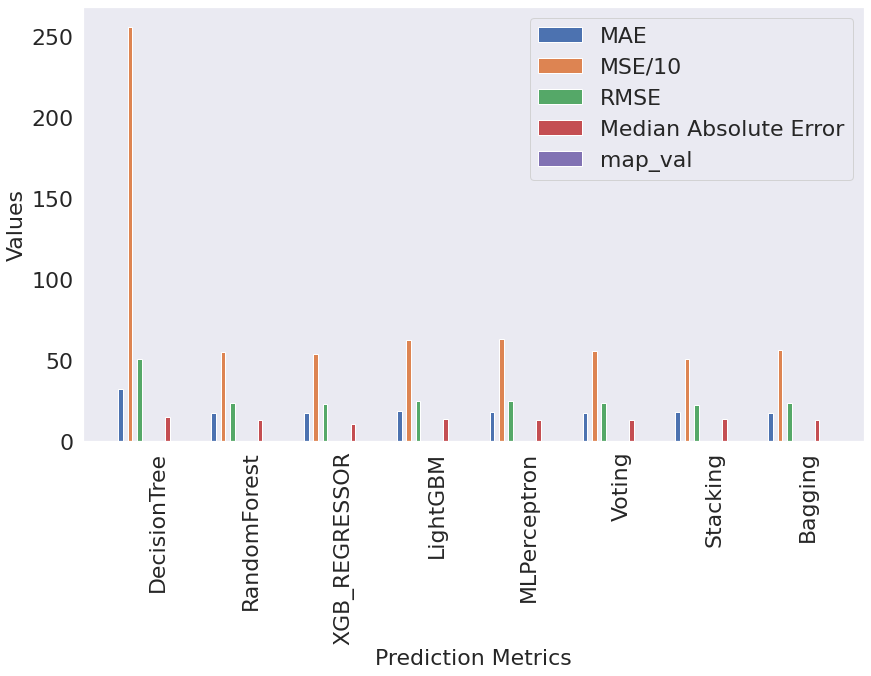

[1.47985696 0.32128077 0.31401329 0.36300367 0.36618862 0.32342338
 0.29459086 0.32506218]
[0 1 2 3 4 5 6 7] <class 'numpy.ndarray'> 8


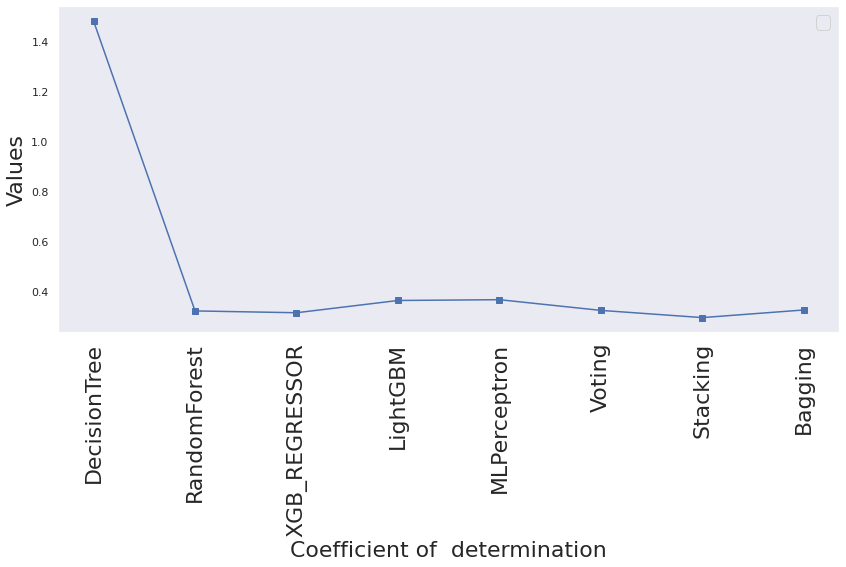

,MAE,MSE,RMSE,MAPE,Median Absolute Error,1-CD
Algorithm,,,,,,
Stacking,17.940,508.720,22.555,0.396,14.000,0.295
XGB_REGRESSOR,17.240,542.260,23.286,0.272,11.000,0.314
RandomForest,17.670,554.810,23.554,0.288,13.000,0.321
Voting,17.610,558.510,23.633,0.285,13.000,0.323
Bagging,17.600,561.340,23.693,0.282,13.000,0.325
LightGBM,18.800,626.860,25.037,0.308,14.000,0.363
MLPerceptron,18.380,632.360,25.147,0.286,13.000,0.366
DecisionTree,32.200,2555.520,50.552,0.456,15.000,1.480


In [ ]:
category_metric=models1
d = {'Algorithm': category_metric, 'MAE': MAE_vec,'MSE':MSE_vec,'RMSE':RMSE_vec,'MAPE': map_val_vec,'Median Absolute Error':medianAbsoluteError_vec,'1-CD':CD_vec}
df = pd.DataFrame(data=d)  #'Score_MSE':scoresMSE_vec,
df.set_index('Algorithm',inplace=True)
df.sort_values(by=['RMSE'],inplace=True)
df.to_csv('/content/drive/MyDrive/NasaRULfres/Metrics.csv')
plotbarMAEMSE(MAE_vec,MSE_vec,RMSE_vec,map_val_vec,medianAbsoluteError_vec,category_metric)
plotbarCD(CD_vec,category_metric)
df.head(df.shape[0])


**for linear RUL and ML models the best models is xgboost with RMSE= 23.756 while the best model is the neural network with RMSE=	23.276
some nehancement could be done**

1.  filter denosing:the savitsky golay filter degrade models performances
2.  outliers handling: with winsorize the best model stacking rmse:22.456 with floor_cap bagging 23.030 with LOF bagging 21.0...
3.  feature selection
4.  neural network training
5. expo smoothing stacking 21.863



# **HPO**

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestRegressor( **params)
    score = -np.mean(cross_val_score(clf, X_train,Y_train, cv=3, n_jobs=-1,
                                    scoring="neg_mean_squared_error"))

    return {'loss':score, 'status': STATUS_OK }
    #Random Forest

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 13, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['squared_error','absolute_error'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=3)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 3/3 [00:10<00:00,  3.44s/it, best loss: 0.004128141649581468]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 47.0, 'max_features': 8.0, 'min_samples_leaf': 2.0, 'min_samples_split': 3.0, 'n_estimators': 51.0}


In [ ]:
best

{'criterion': 0,
 'max_depth': 33.0,
 'max_features': 8.0,
 'min_samples_leaf': 8.0,
 'min_samples_split': 6.0,
 'n_estimators': 63.0}

In [ ]:
rdfr= RandomForestRegressor(criterion= 'squared_error',max_depth= 33, max_features= 8,
min_samples_leaf= 8,
min_samples_split= 6,
n_estimators= 63)
 # prepare the model with input scaling
pipeline = Pipeline(steps=[('Quantile', QuantileTransformer()),('rdfr',rdfr)])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=QuantileTransformer())
model.fit(X_train,Y_train)
yhat = model.predict(X_test)


In [ ]:
test = pd.merge(test, test.groupby('unit',as_index=False)['cycles'].max(), how='left', on='unit')
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
name='rdfr'
test["score of %s"%name] = scores[name]
#for piecewise RUL
test['maxpredcycles of%s'%name] = totcycles(test,name) 
test.drop(columns=["score of %s"%name,'maxpredcycles of%s'%name],axis=1,inplace=True)
t = test.columns == 'RUL of%s'%name
ind = [i for i, x in enumerate(t) if x]
predictedRUL = []
for i in range(test.unit.min(), test.unit.max()+1):
  npredictedRUL=test[test.unit==i].iloc[test[test.unit==i].cycles.max()-1,ind]
  predictedRUL.append(npredictedRUL)
xtrueRUL = list(RUL['RUL'])
otrueRUL = []
for i in range(0,len(xtrueRUL)):
  otrueRUL = np.concatenate((otrueRUL,list(reversed(np.arange(int(xtrueRUL[i]))))))
xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []
for i in range(0,len(xpredictedRUL)):
   opredictedRUL = np.concatenate((opredictedRUL,list(reversed(np.arange(xpredictedRUL[i].item())))))
xpredictedRUL1= []
for i in range(0,len(xpredictedRUL)):
     xpredictedRUL1.append(int(xpredictedRUL[i]))  
xpredictedRUL2 = np.array(xpredictedRUL1)
xpredictedRUL2 = np.array(xpredictedRUL1)
final_rul[name]=xpredictedRUL2 